In [2]:
import numpy as np
rng = np.random.default_rng()
import pandas as pd

In [5]:
def plot_multiple_runs(data_model):
    groups = data_model.groupby("run")
    for _, g in groups:
        g.index = g["generation"]
        g["p"].plot(lw=.5, ylim=(0,1))

    data_model.groupby("generation")["p"].mean().plot(c="k", lw="1")

In [39]:
def biased_transmission_direct(N, s_a, s_b, p_0, t_max, r_max):
    # Create the output DataFrame
    output = pd.DataFrame({
        "generation" : np.tile(np.arange(t_max), r_max),
        "p" : [ np.nan ] * t_max * r_max,
        "run" : np.repeat(np.arange(r_max), t_max)
    })

    for r in range(r_max):
        # Create first generation
        population = pd.DataFrame({"trait": rng.choice(["A", "B"], size=N, replace=True, p=[p_0, 1 - p_0])})

        # Add first generation's p for run r
        output.loc[ r * t_max, "p"] = population[ population["trait"] == "A" ].shape[0] / N

        # For each generation 
        for t in range(1,t_max):
            # Copy individuals to previous_population DataFrame
            previous_population = population.copy()

            # For each individual, pick a random individual from the previous generation
            demonstrator_trait = previous_population["trait"].sample(N, replace=True).reset_index()
            
            # Biased probabilities to copy
            copy_a = rng.choice([True, False], size=N, replace=True, p=[s_a, 1 - s_a])
            copy_b = rng.choice([True, False], size=N, replace=True, p=[s_b, 1 - s_b])

            # If the demonstrator has trait A and the individual wants to copy A, then copy A
            condition = copy_a & (demonstrator_trait["trait"] == "A")
            if condition.sum() > 0:
                population.loc[condition, "trait"] = "A"

            # If the demonstrator has trait B and the individual wants to copy B, then copy B
            condition = copy_b & (demonstrator_trait["trait"] == "B")
            if condition.sum() > 0:
                population.loc[condition, "trait"] = "B"

            # Get p and put it into output slot for this generation t and run r
            output.loc[r * t_max + t, "p"] = population[ population["trait"] == "A" ].shape[0] / N

    return output 

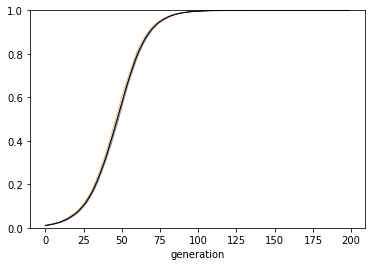

In [60]:
data_model = biased_transmission_direct(N=10_000, s_a=.1, s_b=0, 
                                         p_0=.01, t_max=200, r_max=5)
plot_multiple_runs(data_model)

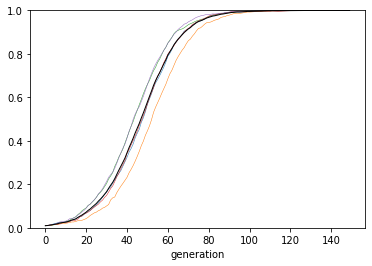

In [62]:
data_model = biased_transmission_direct(N=10_000, s_a=.6, s_b=.5, 
                                         p_0=.01, t_max=150, r_max=5)
plot_multiple_runs(data_model)

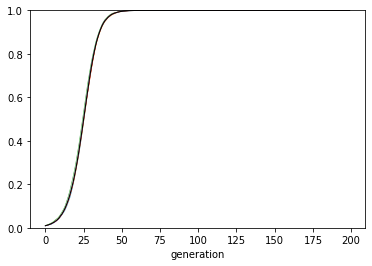

In [63]:
data_model = biased_transmission_direct(N=10_000, s_a=.2, s_b=0, 
                                         p_0=.01, t_max=200, r_max=5)
plot_multiple_runs(data_model)